# Intermediate Algebra

## Find Factors, Prime Factorizations, and Least Common Multiples

### Calculate a series of multiples; the product of a base number and a counting number.

Two methods are shown.

- The first is the familiar for loop method, printing the output to the sys.stdout.
- The second returns a pandas DataFrame, with a single series.

In [3]:
import numpy as np
import pandas as pd
import json
import time

def big_table(count: int, counting_number):

    '''
    Show a big table of multiples.

    Parameters:

        count : int     The number of base number tables to generate.
    '''

    table_container = []

    for i in range(1, count+1):

        table_container.append(mult_table_internal(i, counting_number))

    df = pd.DataFrame()

    for i in table_container:

        df = pd.concat([df, i], axis=1, ignore_index=True)

    df.columns = [x for x in range(1, df.shape[1]+1)]
    
    return df

def mult_table(base: int, count: int) -> pd.DataFrame:

    '''
    Calculate and display the multiples of a base number.

    Formula: base*i for i in range(count).

    Parameters:

        base : int      The base number for which to calculate multiples.

        count : int     The range of counting numbers.

    Returns:

        df : dataframe  The table of mutliples in a dataframe.
    '''

    start = time.time()

    base = int(base)

    count = int(count)

    '''
    Traditional for loop method:

    for i in range(1, count+1, 1):

        print(f'{base} * {i} = {base*i}')
    '''

    df = pd.DataFrame([base*i for i in range(count+1)], columns=[f'Multiples of {base}'], index=[f'{base}*{i}' for i in range(count+1)])

    stop = time.time()

    return df

def mult_table_internal(base: int, count: int) -> pd.DataFrame:

    '''
    Calculate and display the multiples of a base number.

    Formula: base*i for i in range(count).

    Parameters:

        base : int      The base number for which to calculate multiples.

        count : int     The range of counting numbers.

    Returns:

        df : dataframe  The table of mutliples in a dataframe.
    '''

    start = time.time()

    base = int(base)

    count = int(count)

    '''
    Traditional for loop method:

    for i in range(1, count+1, 1):

        print(f'{base} * {i} = {base*i}')
    '''

    df = pd.DataFrame([base*i for i in range(count+1)])

    stop = time.time()

    return df

In [201]:
mult_table(3, 12).T

,3*0,3*1,3*2,3*3,3*4,3*5,3*6,3*7,3*8,3*9,3*10,3*11,3*12
Multiples of 3,0,3,6,9,12,15,18,21,24,27,30,33,36


In [255]:
df = big_table(12,12)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
1,0,1,2,3,4,5,6,7,8,9,10,11,12
2,0,2,4,6,8,10,12,14,16,18,20,22,24
3,0,3,6,9,12,15,18,21,24,27,30,33,36
4,0,4,8,12,16,20,24,28,32,36,40,44,48
5,0,5,10,15,20,25,30,35,40,45,50,55,60
6,0,6,12,18,24,30,36,42,48,54,60,66,72
7,0,7,14,21,28,35,42,49,56,63,70,77,84
8,0,8,16,24,32,40,48,56,64,72,80,88,96
9,0,9,18,27,36,45,54,63,72,81,90,99,108
10,0,10,20,30,40,50,60,70,80,90,100,110,120


### If divisible?

We want to check divisiblity to confirm a number is a multiple.

Write an algorithm to test if the input number `n` is a multiple of `x`.

In [203]:
def divisibility_check(number):

    if number%10 == 0 or number%10 == 2 or number%10 == 4 or number%10 == 6 or number%10 == 8:

        print('Divisible by 2')

    if sum([int(i) for i in list(str(number))])%3 == 0:

        print('Divisible by 3')

    if number%10 == 0 or number%10 == 5:

        print('Divisible by 5')

    if (number%10 == 0 or number%10 == 2 or number%10 == 4 or number%10 == 6 or number%10 == 8) and (sum([int(i) for i in list(str(number))])%3 == 0):

        print('Divisible by 6')
    
    if number%10 == 0:

        print('Divisible by 10')

In [204]:
divisibility_check(24)

Divisible by 2
Divisible by 3
Divisible by 6


### Factorize

Display the factors of n, and whether it is prime or composite.

In [12]:
def factorize(number):

    '''
    Display factors of `n`, and check primality.

    This works by making a list of linear values from 1 to n,
    
        and checking them against every other linear value from 1 to n.

    Parameters

        n : int - The number to factorize and check for primality.

    Note:

        Could be optimized by:

            - Returning false if `n` is less than or equal to 3.

            - Ending the algorithm when n > sqrt(n), where sqrt(n) == i>j effectively.
    '''

    if number == 1:

        print('Factors: [1]')

        print('It took mathematicians more than 1000 years to decided whether or not 1 is prime.\nI guess they\'ve mostly settled on No.')
    
    else:
        
        sample_range = []

        factors = []

        for i in np.linspace(1, number, number, dtype=int):

            sample_range.append(i)

            # print(sample_range)
        
        for i in range(number):

            # print(f'range {i}')

            for j in sample_range:

                # print(f'sample range {j}')

                if i>j:

                    pass
                
                elif i*j == number:

                    print(f'{i}*{j}=={number}, appending.')

                    factors.append(i)
                    
                    factors.append(j)

        factors.sort()

        print(f'Factors: {factors}')

        if factors[1] == number:

            print(f'{number} is prime.')

        else:

            print(f'{number} is composite.')

        return factors

def factorize_df(number):

    '''
    Return a table of factors of n as index, and their factors as a list.

    Parameters

        number : int - n to factor.
    '''

    dict = {}

    for i in factorize(number):

        dict[i] = factorize(i)

    return pd.DataFrame.from_dict(dict, orient='index')

In [22]:
f = factorize(75)

1*75==75, appending.
3*25==75, appending.
5*15==75, appending.
Factors: [1, 3, 5, 15, 25, 75]
75 is composite.


In [207]:
f = factorize(2)

Factors: [1, 2]
2 is prime.


In [208]:
f = factorize(1)

Factors: [1]
It took mathematicians more than 1000 years to decided whether or not 1 is prime.
I guess they've mostly settled on No.


### Multiplicative Inverse

Display the multiplicative inverse of n, which if you know what that is congratulations on your job in mathematics.

In [209]:
def multiplicative_inverse(number):

    '''
    Display the multiplicative inverse of n.

    Formula: n * (1/n) = 1, where (1/n) is the multiplicative inverse.

    Parameters:

        number : int - The number from which to determine the multiplicative inverse.
    '''

    if number * (1/number) == 1.0:

        print(f'{1/number} is the multiplicative inverse of {number}.')

In [210]:
multiplicative_inverse(8762)

0.00011412919424788861 is the multiplicative inverse of 8762.


In [211]:
0.00011412919424788861 * 8762

1.0

### Common Multiples

#### Find the common multiples of 2 sets of numbers, with pandas.

Create `DataFrames` from our multiples functions, and use them for other computations.

In [212]:
def common_multiples_df(x1, x2, y):

    '''
    Find the common multiples between x1*y and x2*y, with dataframes.

    Parameters:

        x1 : int - Base number a.

        x2 : int - Base number b.

        y : int - Counting number.
    '''

    df = mult_table(x1, y)
    df2 = mult_table(x2, y)

    df.columns, df2.columns = [0],[0]

    df = df.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)

    common_multiples = []

    for i in df2[0]:
        
        for j in df[0]:

            if i == j:

                common_multiples.append(i)

    return common_multiples

x1 = input('Base number a:')
x2 = input('Base number b:')

y = input('Counting number: ')

print(f'Common multiples between {x1}*{y} and {x2}*{y}: {common_multiples_df(x1, x2, y)}')

Common multiples between 10*10 and 25*10: [0, 50, 100]


#### Sets with python

"Computing mathematical operations such as intersection, union, difference, and symmetric difference." - [python.org](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset)

\* Also note, sets are unordered in python so they lose their order of insertion and position.



In [213]:
def set_tests(x1, x2, y):

    '''
    Find the common multiples between x1*y and x2*y, with pandas and python.

    Parameters:

        x1 : int - Base number a.

        x2 : int - Base number b.

        y : int - Counting number.
    '''

    df = mult_table(x1, y)
    df2 = mult_table(x2, y)

    df.columns, df2.columns = [0],[0]

    df = df.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)

    set_1, set_2 = set(df[0].sort_values()), set(df2[0].sort_values())

    print(f'Membership test: {set_1} in {set_2}? {set_1 in set_2}')
    
    print(f'Non-membership test: {set_1} not in {set_2}? {set_1 not in set_2}')

    print(f'Disjoint test: {set_1} is disjoint {set_2}? {set_1.isdisjoint(set_2)}')

    print(f'Union: {set_1} | {set_2} = {set_1.union(set_2)}')

    print(f'Intersection: {set_1} & {set_2} = {set_1.intersection(set_2)}')

    print(f'Difference: {set_1} - {set_2} = {set_1.difference(set_2)}')

x1 = input('Base number a:')
x2 = input('Base number b:')

y = input('Counting number:')

set_tests(x1, x2, y)

Membership test: {0, 100, 70, 40, 10, 80, 50, 20, 90, 60, 30} in {0, 225, 100, 200, 75, 175, 50, 150, 25, 250, 125}? False
Non-membership test: {0, 100, 70, 40, 10, 80, 50, 20, 90, 60, 30} not in {0, 225, 100, 200, 75, 175, 50, 150, 25, 250, 125}? True
Disjoint test: {0, 100, 70, 40, 10, 80, 50, 20, 90, 60, 30} is disjoint {0, 225, 100, 200, 75, 175, 50, 150, 25, 250, 125}? False
Union: {0, 100, 70, 40, 10, 80, 50, 20, 90, 60, 30} | {0, 225, 100, 200, 75, 175, 50, 150, 25, 250, 125} = {0, 70, 200, 10, 75, 80, 20, 150, 25, 90, 30, 225, 100, 40, 175, 50, 250, 60, 125}
Intersection: {0, 100, 70, 40, 10, 80, 50, 20, 90, 60, 30} & {0, 225, 100, 200, 75, 175, 50, 150, 25, 250, 125} = {0, 50, 100}
Difference: {0, 100, 70, 40, 10, 80, 50, 20, 90, 60, 30} - {0, 225, 100, 200, 75, 175, 50, 150, 25, 250, 125} = {70, 40, 10, 80, 20, 90, 60, 30}


### Least Common Multiples

Using the prime factors method

In [214]:
from IPython.display import clear_output

# get table of factors
df = factorize_df(124)
clear_output()
df
# by what criteria do we choose factors to simplify?

,0
1,None
2,"[1, 2]"
4,"[1, 2, 2, 4]"
31,"[1, 31]"
62,"[1, 2, 31, 62]"
124,"[1, 2, 4, 31, 62, 124]"


### Graph a number line

In [215]:
import matplotlib.pyplot as plt

class Plotter:

    def __init__(self, x, y):

        '''
        Simple data plotter.

        Parameters:

            x : float|int

            y : float|int

            optional

                title : str - Title of the plot.

        Methods:

            plot()
        '''

        self._x = x

        self._y = y

    def plot(self, ax=None, **kw):

        '''
        Rigid plotter for a 2d line plot.
        '''

        if ax is None:

            ax = plt.gca()

        ax.plot(self._x, self._y)
        
        ax.set_title(kw.get('title', ''))

        return ax

<AxesSubplot:title={'center':'My time.'}>

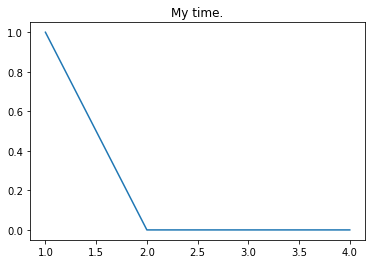

In [216]:
d = Plotter([1, 2, 3, 4], [1, 0, 0, 0])
d.plot(title='My time.')


#### Custom timer decorator for timing calculations

Create a decorator to wrap functions in a timer, for testing and optimizing calculations and functions.

In [257]:
import time

def timer_1(func):

    def wrapper(*args):

        start = time.time()

        print(f'Time started: {start}')

        func(*args)

        stop = time.time()

        print(f'Time started: {stop}')

        return func(*args)
    
    return wrapper

@timer_1
def costly_calc(*args):

    return big_table(*args)

In [259]:
costly_calc(100,100)


Time started: 1667176200.1072462
Time started: 1667176200.1462345


,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
2,2,4,6,8,10,12,14,16,18,20,...,182,184,186,188,190,192,194,196,198,200
3,3,6,9,12,15,18,21,24,27,30,...,273,276,279,282,285,288,291,294,297,300
4,4,8,12,16,20,24,28,32,36,40,...,364,368,372,376,380,384,388,392,396,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,192,288,384,480,576,672,768,864,960,...,8736,8832,8928,9024,9120,9216,9312,9408,9504,9600
97,97,194,291,388,485,582,679,776,873,970,...,8827,8924,9021,9118,9215,9312,9409,9506,9603,9700
98,98,196,294,392,490,588,686,784,882,980,...,8918,9016,9114,9212,9310,9408,9506,9604,9702,9800
99,99,198,297,396,495,594,693,792,891,990,...,9009,9108,9207,9306,9405,9504,9603,9702,9801,9900


# Function check

Does this relation represent a function?

Check each independent variable, and if it reappears in the list, is the dependent variable the same as the first appearance? If so, this is a function.

This will dumbly check each and print it's results in a very spaghetti spill way.

In [103]:
def swap(_range, _domain):
    return list(zip(_range, _domain))

def check():

    for index, item in enumerate(relation):

        print(f'{index}: i={item[0]}, o={item[1]}')
        domain.append(item[0])
        range.append(item[1])

        if item[0] in relation_dict.keys():

            print(f'{item[0]} in {relation_dict.keys()}')

            if relation_dict[item[0]] != item[1]:

                print(f'{relation_dict[item[0]]} != {item[1]}')
                raise UserWarning('Not a function, independent \
variable yields multiple outputs, not deterministic')

        relation_dict[item[0]] = item[1]

    print('''
i: independent variable, input
o: dependent variable, output
    ''')
    print(f'Domain: {domain}, Range: {range}')

# relation = {(1,2), (2,4), (3,6), (4,8), (5,10)} # function
# relation = {(1,2), (2,4), (1,6), (4,8), (5,10)} # not a function
# relation = {(1,2), (2,4), (1,2), (4,8), (5,10)} # function
relation = {('plain donut', 1.49), ('jelly donut', 1.99), ('chocolate donut', 1.99)} # function
relation = {(1.49, 'plain donut'), (1.99, 'jelly donut'), (1.99, 'chocolate donut')} # not a function
# relation = {('0-56', 0.0), ('57-61', 1.0), ('62-66', 1.5), ('67-71', 2.0), ('72-77', 2.5), ('78-86', 3.0), ('87-91', 3.5), ('92-100', 4.0)} # function
relation = {('Babe Ruth', 1), ('Willie Mays', 2), ('Ty Cobb', 3), ('Walter Johnson', 4), ('Hank Aaron', 5)} # function



print(f'Relation: {relation}')
domain = []
range = []
relation_dict = {}
check()

relation_list = []
relation_list.append(f'{relation} was tested and passed the function check.')
print(relation_list, '\n')

# if you want to check and see the relation is a function
# after swapping domain and range run next

relation = set(swap(range, domain))
print(f'Relation: {relation}')
domain = []
range = []
relation_dict = {}
check()

relation_list.append(f'{relation} was tested and passed the function check.')
print(relation_list)

Relation: {('Walter Johnson', 4), ('Babe Ruth', 1), ('Hank Aaron', 5), ('Ty Cobb', 3), ('Willie Mays', 2)}
0: i=Walter Johnson, o=4
1: i=Babe Ruth, o=1
2: i=Hank Aaron, o=5
3: i=Ty Cobb, o=3
4: i=Willie Mays, o=2

i: independent variable, input
o: dependent variable, output
    
Domain: ['Walter Johnson', 'Babe Ruth', 'Hank Aaron', 'Ty Cobb', 'Willie Mays'], Range: [4, 1, 5, 3, 2]
["{('Walter Johnson', 4), ('Babe Ruth', 1), ('Hank Aaron', 5), ('Ty Cobb', 3), ('Willie Mays', 2)} was tested and passed the function check."] 

Relation: {(4, 'Walter Johnson'), (1, 'Babe Ruth'), (3, 'Ty Cobb'), (2, 'Willie Mays'), (5, 'Hank Aaron')}
0: i=4, o=Walter Johnson
1: i=1, o=Babe Ruth
2: i=3, o=Ty Cobb
3: i=2, o=Willie Mays
4: i=5, o=Hank Aaron

i: independent variable, input
o: dependent variable, output
    
Domain: [4, 1, 3, 2, 5], Range: ['Walter Johnson', 'Babe Ruth', 'Ty Cobb', 'Willie Mays', 'Hank Aaron']
["{('Walter Johnson', 4), ('Babe Ruth', 1), ('Hank Aaron', 5), ('Ty Cobb', 3), ('Willie

In [93]:
domain

[4, 1, 3, 2, 5]

In [94]:
range

['Walter Johnson', 'Babe Ruth', 'Ty Cobb', 'Willie Mays', 'Hank Aaron']

In [95]:
relation

{(1, 'Babe Ruth'),
 (2, 'Willie Mays'),
 (3, 'Ty Cobb'),
 (4, 'Walter Johnson'),
 (5, 'Hank Aaron')}

# Steps to Kaprekar's Constant
Because why not...

In [1]:
x = 2317
the_constant = 6174

def desc(input):
    l1 = [i for i in str(x)]
    l1 = list(map(int, l1))
    l1.sort(reverse=True)
    l2 = l1.copy()
    l2.sort()

    return l1, l2

def calc(_l1, _l2):
    l1 = int(''.join([str(i) for i in _l1]))
    l2 = int(''.join([str(i) for i in _l2]))
    print(f'{l1}-{l2} = {l1-l2}')
    return l1 - l2

counter = 0
_x = x
while x != the_constant:
    
    l1, l2 = desc(x)

    x = calc(l1, l2)
    counter += 1

print(f'{_x} is {counter} steps from Kaprekar\'s Constant')

7321-1237 = 6084
8640-468 = 8172
8721-1278 = 7443
7443-3447 = 3996
9963-3699 = 6264
6642-2466 = 4176
7641-1467 = 6174
2317 is 7 steps from Kaprekar's Constant


# Iterators for custom classes

In [27]:
class FancyObject:

    def __init__(self, limit):
        self.limit = limit

    def __iter__(self):
        self.x = 0
        return self

    def __next__(self):
        x = self.x

        if x > self.limit:
            raise StopIteration

        self.x = x + 1
        
        return x

f1 = FancyObject(10)

for i in f1:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
